<a href="https://colab.research.google.com/github/karanmorek4/Colab/blob/main/skin_disease_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [ ]:
# folders

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 class_mode = 'categorical')

Found 426 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

Found 105 images belonging to 7 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
142/142 [==============================] - 325s 2s/step - loss: 9.7932 - accuracy: 0.4671 - val_loss: 2.4665 - val_accuracy: 0.7429
Epoch 2/10
142/142 [==============================] - 11s 75ms/step - loss: 5.0204 - accuracy: 0.6643 - val_loss: 1.4527 - val_accuracy: 0.8762
Epoch 3/10
142/142 [==============================] - 10s 73ms/step - loss: 5.6020 - accuracy: 0.7300 - val_loss: 0.8715 - val_accuracy: 0.9143
Epoch 4/10
142/142 [==============================] - 9s 64ms/step - loss: 3.6242 - accuracy: 0.7958 - val_loss: 2.1250 - val_accuracy: 0.8190
Epoch 5/10
142/142 [==============================] - 10s 73ms/step - loss: 2.7597 - accuracy: 0.8333 - val_loss: 2.2785 - val_accuracy: 0.8762
Epoch 6/10
142/142 [==============================] - 11s 74ms/step - loss: 3.1552 - accuracy: 0.8286 - val_loss: 1.8595 - val_accuracy: 0.8571
Epoch 7/10
142/142 [==============================] - 11s 75ms/step - loss: 3.1067 - accuracy: 0.8192 - val_loss: 2.8367 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)
y_pred

35/35 [==============================] - 1s 27ms/step


array([[3.01933612e-24, 1.42790598e-37, 0.00000000e+00, 0.00000000e+00,
        4.29243752e-32, 1.00000000e+00, 9.65270382e-16],
       [6.18388803e-26, 1.87122120e-29, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 9.08638322e-20, 5.51002342e-24],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.50400385e-29, 1.57750598e-22, 1.20656590e-38],
       [8.85133460e-12, 2.34368557e-26, 0.00000000e+00, 0.00000000e+00,
        1.46107917e-26, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.84953346e-26, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.54997126e-11, 0.00000000e+00, 1.00000000e+00],
       [6.53097368e-12, 2.21759127e-29, 0.00000000e+00, 0.00000000e+00,
        1.06405659e-14, 5.72722815e-30, 1.00000000e+00],
       [4.58663999e-05, 1.21403772e-20, 2.86427680e-35, 0.00000000e+00,
        1.95011221e-18, 2

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

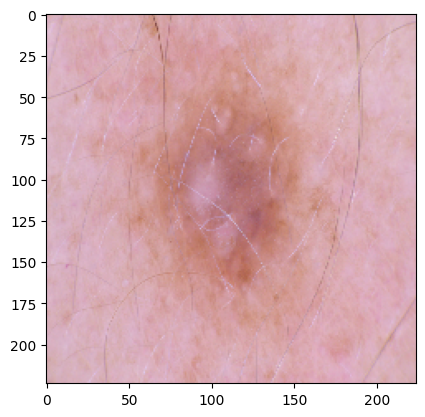

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/test/dermatofibroma/dermatofibroma21.jpg',target_size=(224,224))
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[8.7800395e-01, 1.1118564e-06, 3.0331833e-07, 2.5654864e-04,
        1.8001790e-03, 2.3521052e-03, 1.1758572e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
a

array([0])

In [ ]:
if a == 0 :
  print("scabies")
elif a == 1:
  print("Acne")
elif a == 2:
  print("dermatofibroma")
elif a == 3:
  print("psoriasis")
elif a == 4:
  print("Solar Lentigo")
elif a == 5:
  print("eczema")
elif a == 6:
  print("Melanoma")

scabies
